# The Enron Scandal
Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. It was founded in 1985 as a merger between Houston Natural Gas and InterNorth, both relatively small regional companies. Before its bankruptcy on December 3, 2001, Enron employed approximately 29,000 staff and was a major electricity, natural gas, communications and pulp and paper company, with claimed revenues of nearly $101 billion during 2000. Fortune named Enron "America's Most Innovative Company" for six consecutive years.

At the end of 2001, it was revealed that Enron's reported financial condition was sustained by an institutionalized, systemic and creatively planned accounting fraud, known since as the Enron scandal. Enron has since become a well-known example of willful corporate fraud and corruption. The scandal also brought into question the accounting practices and activities of many corporations in the United States and was a factor in the enactment of the Sarbanes–Oxley Act of 2002. The scandal also affected the greater business world by causing the dissolution of the Arthur Andersen accounting firm, which had been Enron's main auditor for years.

# Data Exploration
The Enron Scandal dataset consists of 146 data points of which 128 are non-POIs and 18 are POIs.

```python
len(data_dict)
146

count_of_nonpoi, count_of_poi = df.groupby('poi')['email_address'].count().tolist()
128, 18
```

There are a total of 20 features and one label (POI).  The features in the dataset are composed of financial features such as bonuses, exercised stock options, and deferred income as well as email communications metadata like messages to a POI or messages from a POI.  

```python
len(df.columns)
21

df.columns.tolist()
['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']
```

The term POI, or person of interest is defined as a person who has been formally accused or charged or settled without admitting guilt in exchange for testimony.  The features have a broad range in their degree of sparsity.  Some features like total payments and total stock values are very available while others like loan_advances and director_fees are significantly less present in the data set.

```python
loan_advances                0.027397
director_fees                0.116438
restricted_stock_deferred    0.123288
deferral_payments            0.267123
deferred_income              0.335616
long_term_incentive          0.452055
bonus                        0.561644
from_messages                0.589041
from_poi_to_this_person      0.589041
from_this_person_to_poi      0.589041
shared_receipt_with_poi      0.589041
to_messages                  0.589041
other                        0.636986
salary                       0.650685
expenses                     0.650685
exercised_stock_options      0.698630
restricted_stock             0.753425
total_payments               0.856164
total_stock_value            0.863014
poi                          1.000000
email_address                1.000000
null_counts_by_person        1.000000
```

In [2]:
import sys
import pickle
import os
sys.path.append(os.path.abspath(("../tools/")))

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedShuffleSplit

from itertools import izip_longest

In [3]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [4]:

### Feature Analysis
df = pd.DataFrame(data_dict).T
number_of_data_points = len(data_dict) # 146
count_of_nonpoi, count_of_poi = df.groupby('poi')['email_address'].count().tolist() # [128, 18]
number_of_features = len(df.columns) # 21 

dtypes = {
    'bonus': pd.Int32Dtype(),
    'deferral_payments': pd.Int32Dtype(),
    'deferred_income': pd.Int32Dtype(),
    'director_fees': pd.Int32Dtype(),
    'email_address': str,
    'exercised_stock_options': pd.Int32Dtype(),
    'expenses': pd.Int32Dtype(),
    'from_messages': pd.Int32Dtype(),
    'from_poi_to_this_person': pd.Int32Dtype(),
    'from_this_person_to_poi': pd.Int32Dtype(),
    'loan_advances': pd.Int32Dtype(),
    'long_term_incentive': pd.Int32Dtype(),
    'other': pd.Int32Dtype(),
    'poi': np.bool_,
    'restricted_stock': pd.Int32Dtype(),
    'restricted_stock_deferred': pd.Int32Dtype(),
    'salary': pd.Int32Dtype(),
    'shared_receipt_with_poi': pd.Int32Dtype(),
    'to_messages': pd.Int32Dtype(),
    'total_payments': pd.Int32Dtype(),
    'total_stock_value': pd.Int32Dtype()
}

### Convert string NaNs to np.nans
for name, features in data_dict.items():
    for feature in features:
        if features[feature] == 'NaN':
            features[feature] = np.nan

data_frame = pd.DataFrame(data_dict).T # Transposed
default_features = data_frame.columns.to_list() # Default Features
default_dtypes = [f.name for f in pd.DataFrame(data_dict).T.dtypes] #Default datatypes

### Imputed Features
data_frame = data_frame.astype(dtypes)
data_frame['null_counts_by_person'] = data_frame.isnull().sum(axis=1).sort_values(ascending=False)
data_frame_sparsity = (data_frame.count()/146).sort_values()

### Task 2: Remove outliers
drop = ('TOTAL', 'THE TRAVEL AGENCY IN THE PARK')
for name in drop:
    data_frame.drop(name, inplace=True)

data_frame.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,null_counts_by_person
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,152,False,126027,-126027,201955,1407,2902,4484442,1729541,2
BADUM JAMES P,NaN,178980,NaN,NaN,nan,257817,3486,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817,14
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,864523,False,1757552,-560222,477,465,566,916197,5243487,5
BAXTER JOHN C,1200000,1295738,-1386055,NaN,nan,6680544,11200,NaN,NaN,NaN,...,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258,8
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,69,False,145796,-82782,239671,NaN,NaN,827696,63014,9


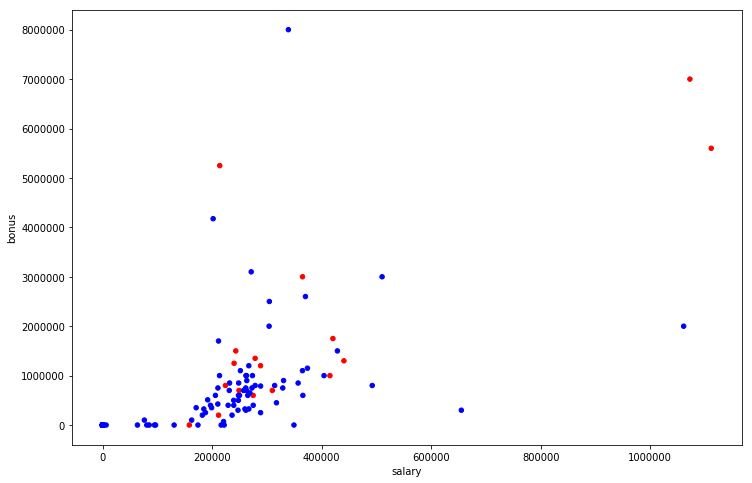

In [5]:
df = data_frame[['poi', 'salary', 'bonus']].fillna(0)
colors = {True: 'red', False: 'blue'}
df.plot.scatter(x='salary', y='bonus', c=df['poi'].apply(lambda x: colors[x]), figsize=(12,8))

In [6]:
### Task 3: Create new feature(s)
data_frame['pct_email_from_poi'] = data_frame['from_poi_to_this_person'] / data_frame['from_messages']
data_frame['pct_email_to_poi'] = data_frame['from_this_person_to_poi'] / data_frame['to_messages']

In [7]:
my_dataset = data_frame.to_dict(orient="index")
features_list = [
    'poi',
    'salary',
    'bonus',
    'exercised_stock_options',
    'director_fees',
    'deferred_income',
    'from_messages',
    'restricted_stock',
    'from_poi_to_this_person',
    'long_term_incentive',
    'from_this_person_to_poi'
 ]

data = featureFormat(my_dataset, features_list, sort_keys = True)
print("dtype: ", type(data), " shape: ", data.shape)


('dtype: ', <type 'numpy.ndarray'>, ' shape: ', (144, 11))


In [8]:
labels, features = targetFeatureSplit(data)

def test_classifier(split_train_test, clf, *args, **kwargs):
    train_X, test_X, train_y, test_y = split_train_test
    classifier = clf(*args, **kwargs)
    classifier.fit(train_X, train_y)
    prediction = classifier.predict(test_X)
    accuracy = accuracy_score(prediction, test_y)
    return accuracy, classifier # returns accuracy and classifier

In [9]:
clean_features = np.nan_to_num(features)

split = train_test_split(clean_features, labels, test_size=0.3, random_state=42)
naive_bayes = test_classifier(split, GaussianNB)
decision_tree = test_classifier(split, DecisionTreeClassifier)
random_forest = test_classifier(split, RandomForestClassifier)
ada_boost = test_classifier(split, AdaBoostClassifier)
logistic_regression = test_classifier(split, LogisticRegression)
linear_support_vector = test_classifier(split, LinearSVC, max_iter=2000)

/develop/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/develop/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/develop/.local/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
tests = [
    naive_bayes, 
    decision_tree, 
    random_forest,
    ada_boost,
    logistic_regression,
    linear_support_vector
]
tests.sort(key=lambda e: e[0])
for accuracy, classifier in tests:
    print(accuracy, classifier.__class__.__name__)

accuracy, classifier = max(tests)
print(classifier.__class__.__name__, ":", accuracy)

(0.7954545454545454, 'GaussianNB')
(0.7954545454545454, 'LinearSVC')
(0.8181818181818182, 'AdaBoostClassifier')
(0.8181818181818182, 'LogisticRegression')
(0.8409090909090909, 'DecisionTreeClassifier')
(0.8636363636363636, 'RandomForestClassifier')
('RandomForestClassifier', ':', 0.8636363636363636)


In [20]:
accuracy, classifier = random_forest
hyper_params = {
    "n_estimators": range(100, 150),
    "max_depth": range(3, len(features_list)-4),
    "min_samples_split": range(2, 5),
}

gscv = GridSearchCV(classifier, hyper_params, cv=10, scoring='accuracy')
train_X, test_X, train_y, test_y = split
gscv.fit(train_X, train_y)
print(gscv.best_params_)

{'min_samples_split': 3, 'n_estimators': 110, 'max_depth': 6}


/develop/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
hyper_params = {
    "n_estimators": range(100, 150),
    "max_depth": range(3, len(features_list)-4),
    "min_samples_split": range(2, 5),
    # "min_samples_leaf": range(1, 2),
    # "min_impurity_decrease": np.arange(0, .17, 0.04)
}

gscv2 = GridSearchCV(
    classifier, 
    hyper_params, 
    cv=10, 
    scoring=[
        'accuracy',
        'precision',
        'recall', 
    ], 
    refit='accuracy'
)
train_X, test_X, train_y, test_y = split
gscv2.fit(train_X, train_y)

/develop/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/develop/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [11]:
best_params = {'min_samples_split': 3, 'n_estimators': 110, 'max_depth': 6}

accuracy, tuned_classifier = test_classifier(split, RandomForestClassifier, **best_params)
print(len(tuned_classifier.feature_importances_ * 100))

10


In [24]:
feature_importances = [
    (feature, importance)
    for feature, importance in zip(features_list[1:], tuned_classifier.feature_importances_ * 100)
]
feature_importances.sort(key=lambda fi: fi[1], reverse=True)
important_features = [
    feature
    for index, (feature, importance) in enumerate(feature_importances)
    if index < 7
]
important_features

['restricted_stock',
 'bonus',
 'exercised_stock_options',
 'long_term_incentive',
 'deferred_income',
 'salary',
 'from_poi_to_this_person']

In [33]:
# # accuracy, classifier = test_classifier(split, RandomForestClassifier, **clf.best_params_)
# best_params = dict(
#     min_samples_split=2,
#     n_estimators=129,
#     max_depth=5
# )
# accuracy, classifier = test_classifier(split, RandomForestClassifier, **best_params)


# # train_X, test_X, train_y, test_y = split
# predictions = classifier.predict(test_X)
# accuracy = accuracy_score(test_y, predictions)
# precision = precision_score(test_y, predictions)
# recall = recall_score(test_y, predictions)

# metrics = dict(
#     accuracy=accuracy,
#     precision=precision,
#     recall=recall
# )
# len(test_X)

important_features = ['poi'] + important_features
important_features

['poi',
 'restricted_stock',
 'bonus',
 'exercised_stock_options',
 'long_term_incentive',
 'deferred_income',
 'salary',
 'from_poi_to_this_person']

In [34]:
from tester import test_classifier

for person, data in data_dict.items():
    for feature, value in data.items():
        if value is np.nan:
            data_dict[person][feature] = 0

test_classifier(tuned_classifier, data_dict, important_features)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85187	Precision: 0.35279	Recall: 0.13300	F1: 0.19317	F2: 0.15193
	Total predictions: 15000	True positives:  266	False positives:  488	False negatives: 1734	True negatives: 12512



In [71]:
import sys
print(sys.version)

2.7.18 (default, Jul 14 2021, 08:11:37) 
[GCC 10.2.1 20210110]
